This script contains the following: 
- 2021 January - 2022 December | Gula ULAHZ6UJFN transaction data 
- Average orders over the month
- Time-series pattern of total monthly orders
- MoM Demand graphs (Quantity against price points).
- MoM VBP price range

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# to prevent the scientific notation. 
pd.set_option('display.float_format', lambda x:'%.4f' % x)

In [2]:
# March to End August
file_name_all = 'data/ULAHZ6UJFN_2.csv'

# file_name = pd.concat([file_km, file_surabaya, file_gresik])
file_name = pd.read_csv(file_name_all)

In [3]:
file_name['province'].value_counts()

JAWA TIMUR     120967
JAWA TENGAH       509
Name: province, dtype: int64

In [4]:
## Start and the end time period 
start_ts = file_name[file_name['province'] == 'JAWA TIMUR'].sort_values(by='order_time_jkt')['order_time_jkt'][0:1].item()
end_ts = file_name[file_name['province'] == 'JAWA TIMUR'].sort_values(by='order_time_jkt')['order_time_jkt'][-2:-1].item()
print('Start: ', start_ts)
print('End: ', end_ts)

Start:  2021-01-18T22:02:42
End:  2022-12-20T22:43:15


In [5]:
start_ts = file_name[file_name['province'] == 'JAWA TIMUR'].sort_values(by='order_time_jkt')

In [6]:
usin= 'ULAHZ6UJFN'

In [7]:
# date time formatting 

# file_name['order_date_jkt']= pd.to_datetime(file_name['order_date_jkt'])
file_name['order_time_jkt']= pd.to_datetime(file_name['order_time_jkt'])
file_name['year'] = file_name['order_time_jkt'].dt.year
file_name['month'] = file_name['order_time_jkt'].dt.month
file_name['year_month'] = pd.to_datetime(file_name['order_time_jkt']).dt.to_period('M')
file_name['day'] = file_name['order_time_jkt'].dt.day
file_name['week'] = file_name['order_time_jkt'].dt.week
file_name['weekday'] = file_name['order_time_jkt'].dt.weekday 
# 0 - Monday, 1- Tuesday

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_4605/3330852580.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  file_name['week'] = file_name['order_time_jkt'].dt.week


In [8]:
file_name.head()

,order_time_jkt,usin,order_id,bp,order_month,order_year,price_sold_at,order_quantity,city,province,year,month,year_month,day,week,weekday
0,2022-12-20 22:46:07,ULAHZ6UJFN,OD16715511676383,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1
1,2022-12-20 22:43:15,ULAHZ6UJFN,OD16715509952644,592500.0000,12,2022,NaN,NaN,GRESIK,JAWA TIMUR,2022,12,2022-12,20,51,1
2,2022-12-20 22:40:47,ULAHZ6UJFN,OD167155084744638,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1
3,2022-12-20 22:37:15,ULAHZ6UJFN,OD167155063515853,592500.0000,12,2022,NaN,NaN,KAB. LAMONGAN,JAWA TIMUR,2022,12,2022-12,20,51,1
4,2022-12-20 22:19:38,ULAHZ6UJFN,OD167154957806591,592500.0000,12,2022,NaN,NaN,SURABAYA,JAWA TIMUR,2022,12,2022-12,20,51,1


In [9]:
# scaler = MinMaxScaler()
# file_name['std_price'] = scaler.fit_transform(np.array(file_name['price_sold_at']).reshape(-1,1))

# how different the QQplots look with different types of transformations. 
# for the price, how does the distribution look like ? 

# Distributions and the various QQplots for the pricing part. 
# Distribution and the various QQplots for the quantity part and check with Eko on how to go about this.  

# sm.qqplot(file_name['std_price'], line ='45')
# plt.ylim([-1,1])

In [10]:
# Derived Columns
file_name['log_quantity'] = file_name['order_quantity'].apply(lambda x: math.log(x))
file_name['log_sp'] = file_name['price_sold_at'].apply(lambda x: math.log(x)).astype('float')
# file_name['log_price']
# file_name['log_std_price'] = file_name['std_price'].apply(lambda x: math.log(x))
# file_name['profit'] = file_name['price_sold_at'] - file_name['pricing_engine_buying_price']

In [11]:
file_name.head()

,order_time_jkt,usin,order_id,bp,order_month,order_year,price_sold_at,order_quantity,city,province,year,month,year_month,day,week,weekday,log_quantity,log_sp
0,2022-12-20 22:46:07,ULAHZ6UJFN,OD16715511676383,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
1,2022-12-20 22:43:15,ULAHZ6UJFN,OD16715509952644,592500.0000,12,2022,NaN,NaN,GRESIK,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
2,2022-12-20 22:40:47,ULAHZ6UJFN,OD167155084744638,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
3,2022-12-20 22:37:15,ULAHZ6UJFN,OD167155063515853,592500.0000,12,2022,NaN,NaN,KAB. LAMONGAN,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
4,2022-12-20 22:19:38,ULAHZ6UJFN,OD167154957806591,592500.0000,12,2022,NaN,NaN,SURABAYA,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN


In [12]:
file_name.groupby(['province']).count()
file_name = file_name[file_name['province'] == 'JAWA TIMUR']

In [13]:
# Analysis of the order Quantities. 
file_name[['year_month','order_quantity']].groupby(by=['year_month'],as_index=False).sum()
plt1 = file_name[['year_month','order_quantity']].groupby(by=['year_month'],as_index=False).sum()

### Monthly Time Series Graph: Total Orders

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

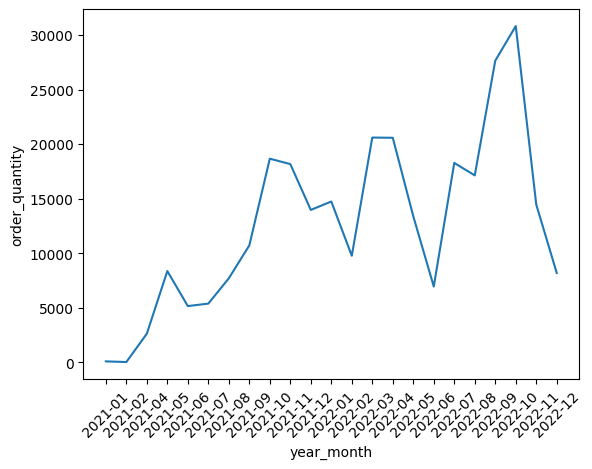

In [14]:
sns.lineplot(y = plt1['order_quantity'], x= plt1['year_month'].astype('str'))
plt.xticks(rotation=45)

- The sales are recorded from last October 2021. 
- Have skyrocketed in the July, August, September 2022. 
- Month by Month price elasticities. 
- Ramadan Dates 
- 2021: 12 April - 12 May 
- 2022: 2 April - 2 May 
- 2023: 22 March - 21 April

### Average orders over the weekdays 

<AxesSubplot:xlabel='weekday', ylabel='order_quantity'>

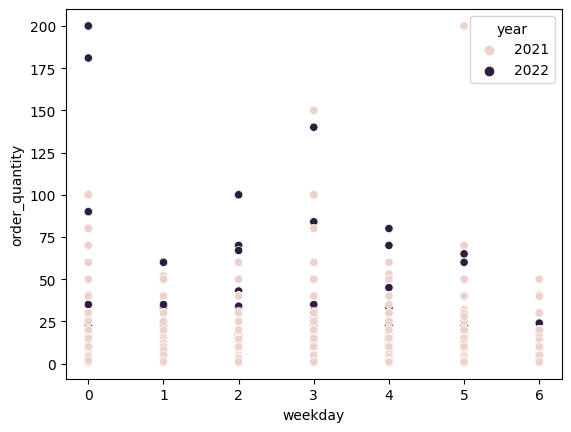

In [15]:
# file_name[file_name['month'] == 11]
sns.scatterplot(y = file_name['order_quantity'], x= file_name['weekday'], hue=file_name['year'])

# Monday - 0 
# Sunday - 6 

### Aggregated Demand Curve: Order Quantity against the unit price

<AxesSubplot:xlabel='price_sold_at', ylabel='order_quantity'>

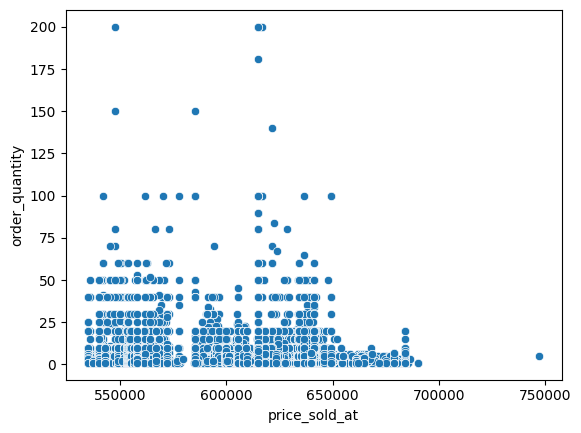

In [16]:
# Check the trend of the number of orders. 
sns.scatterplot(y = file_name['order_quantity'], x= file_name['price_sold_at'])

### Monthly Demand Curve: Order Quantity against the unit price

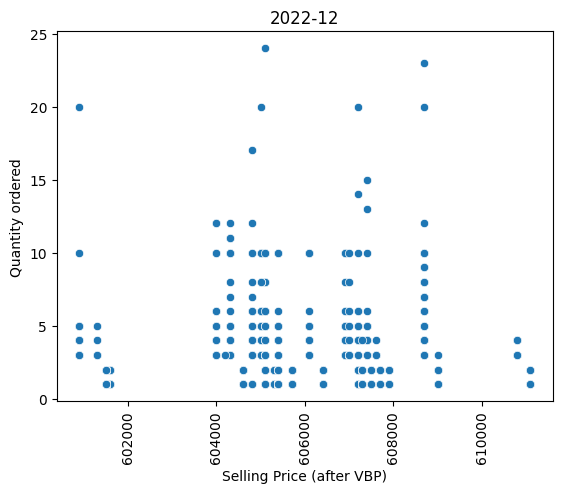

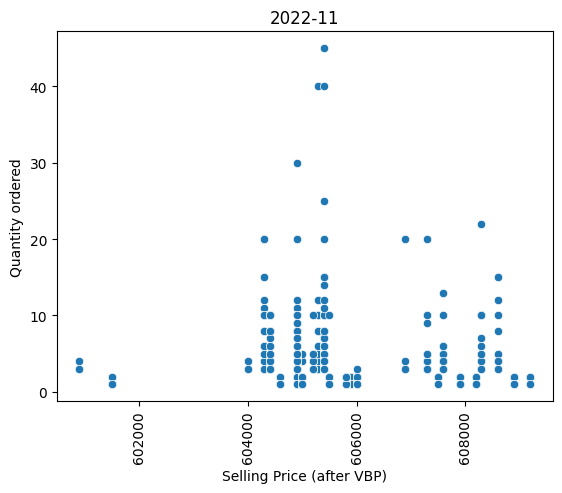

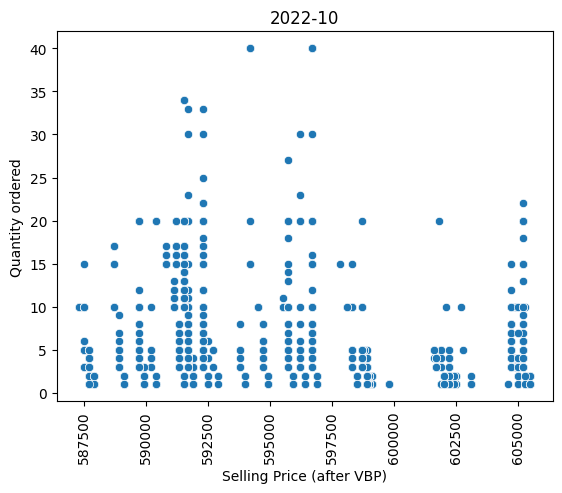

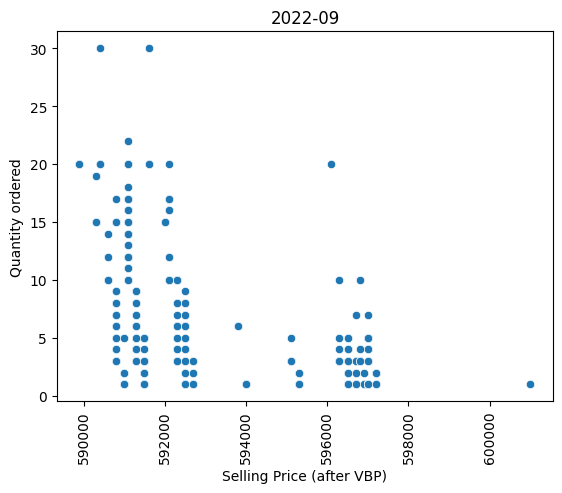

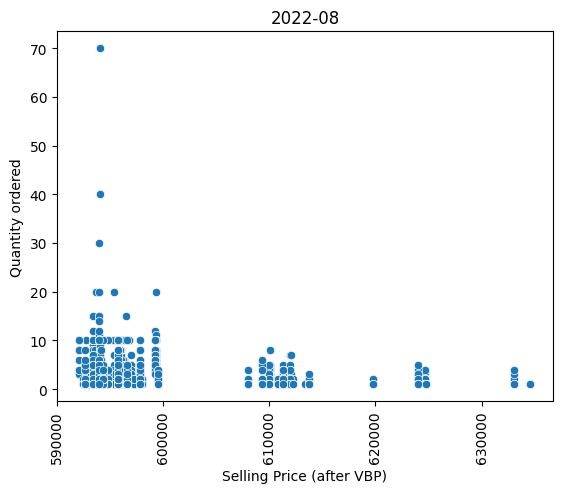

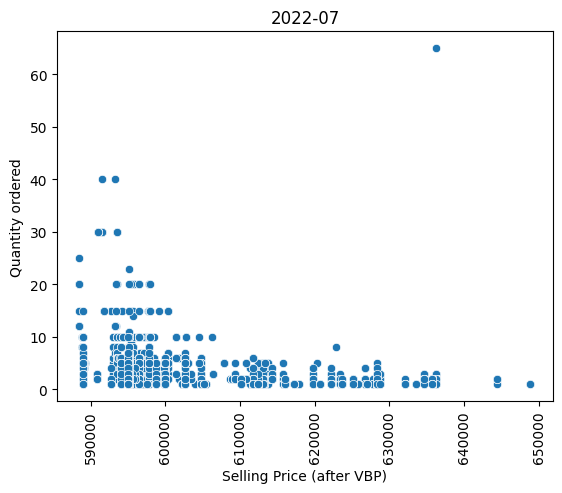

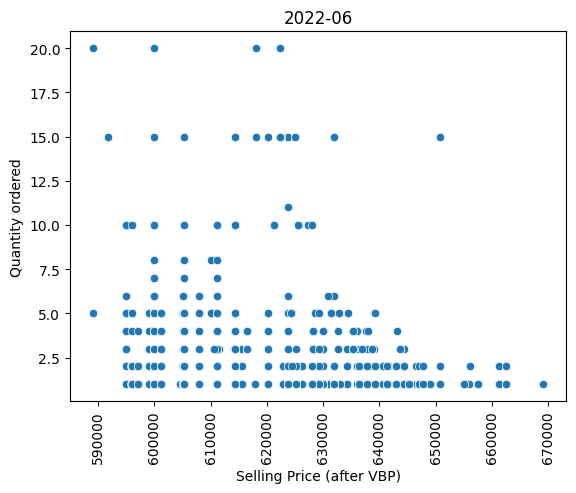

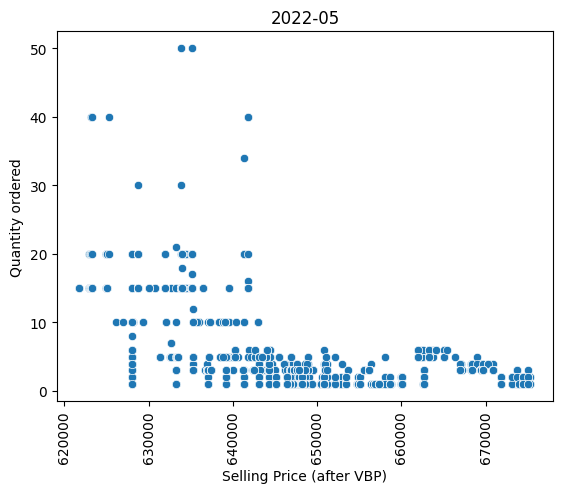

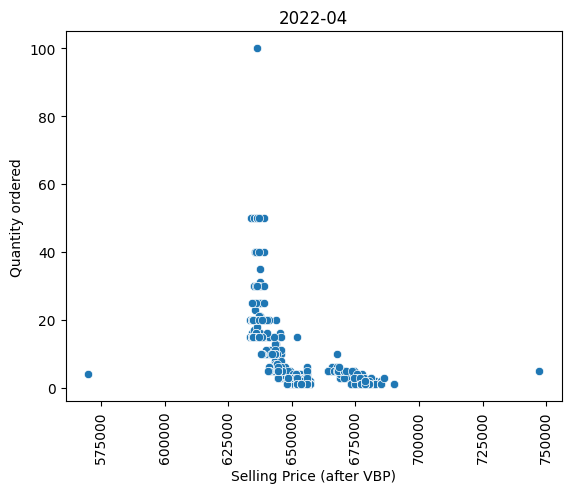

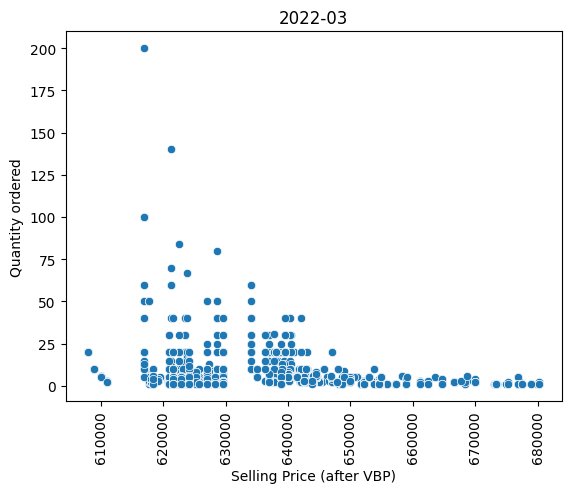

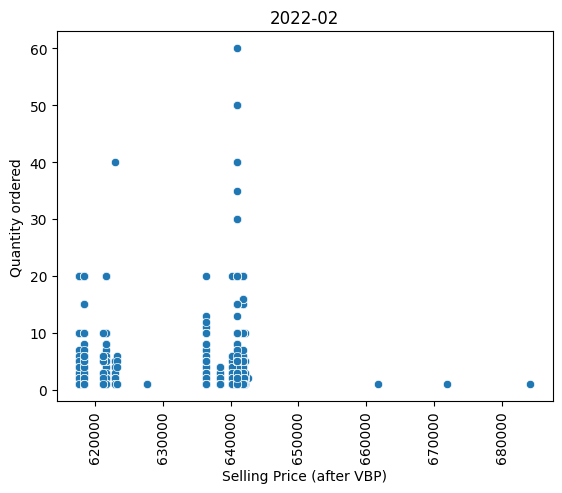

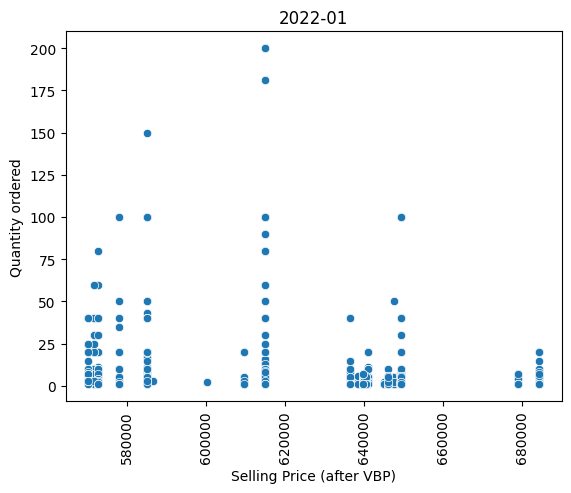

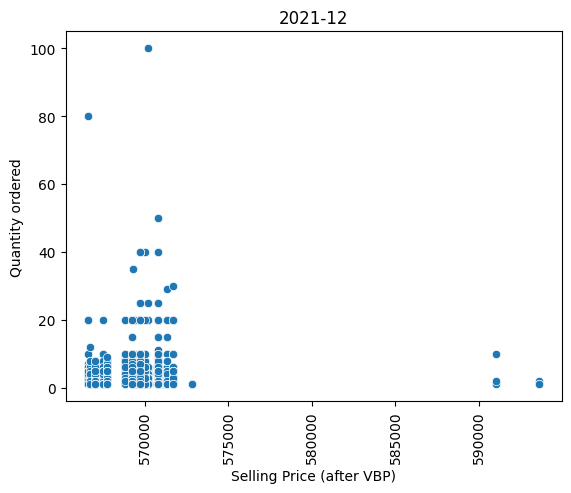

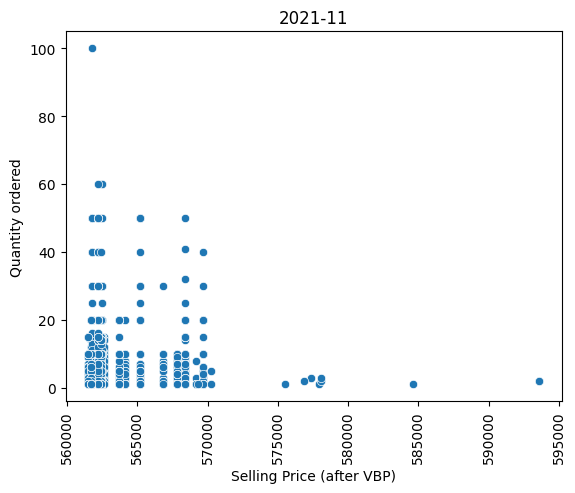

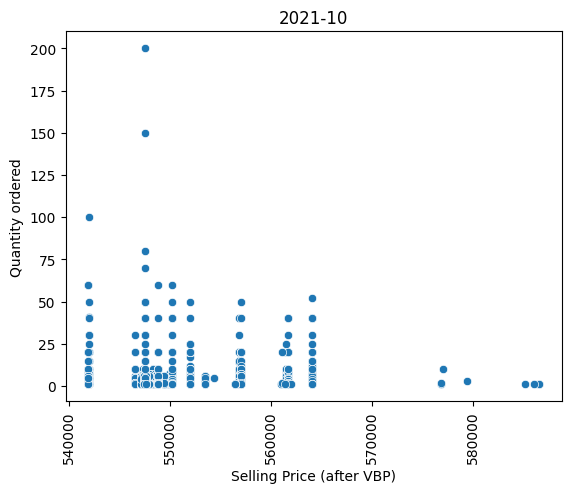

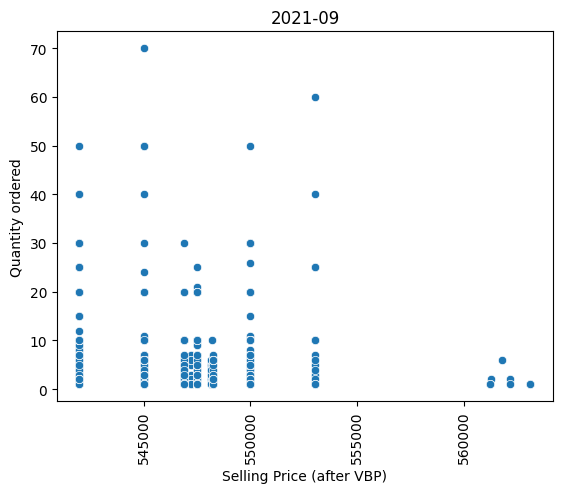

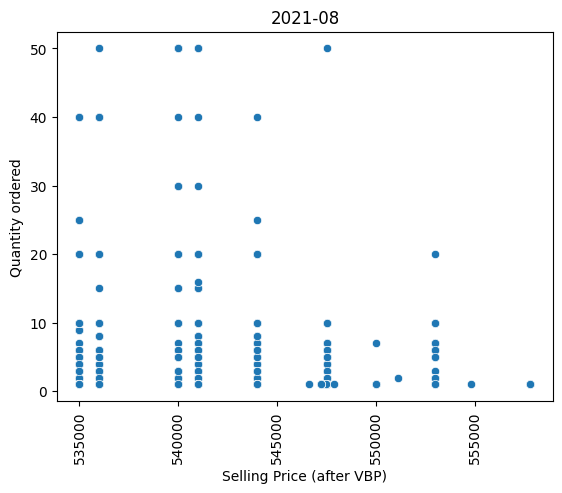

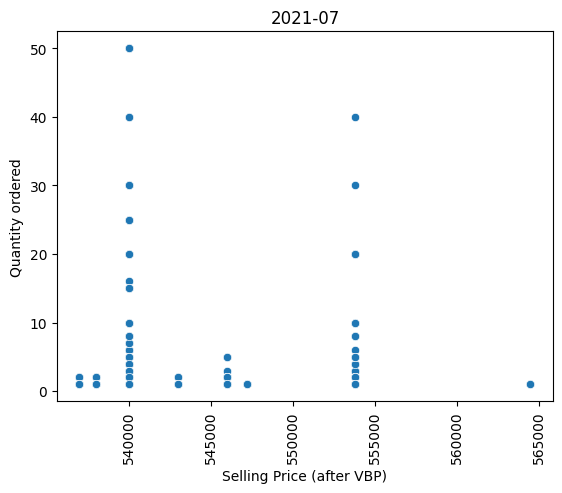

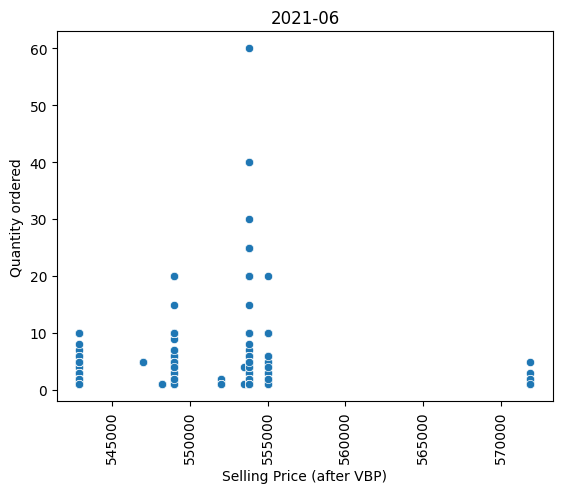

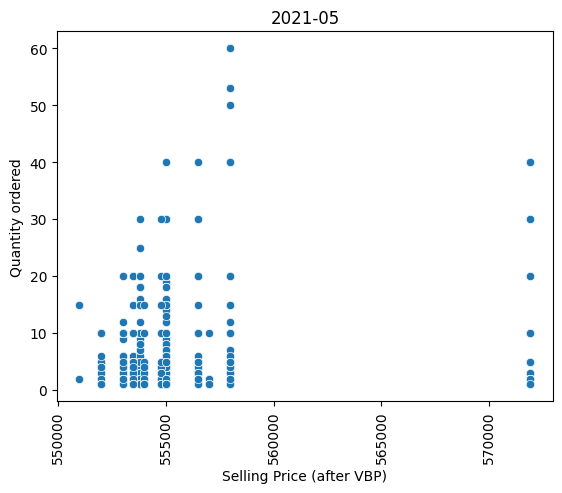

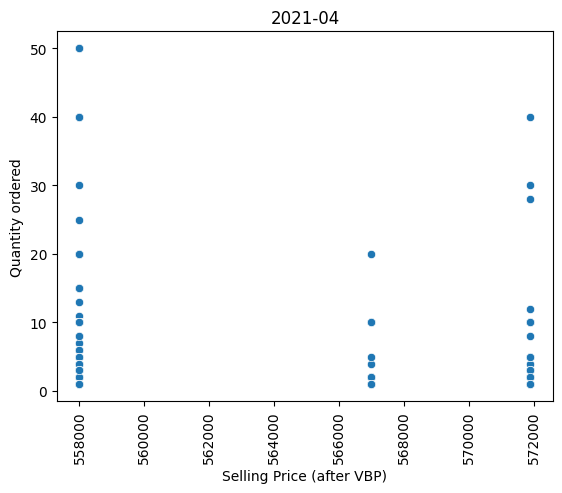

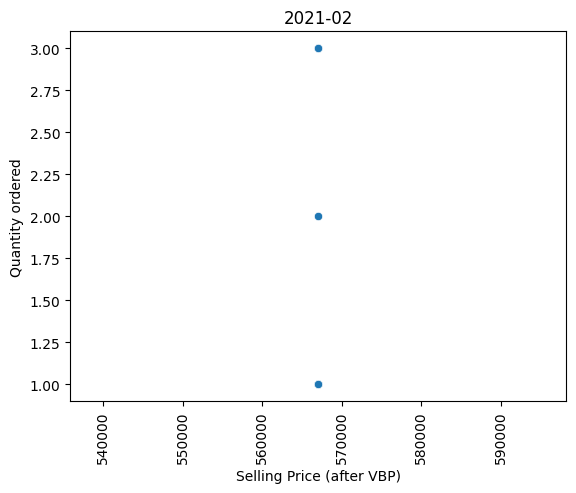

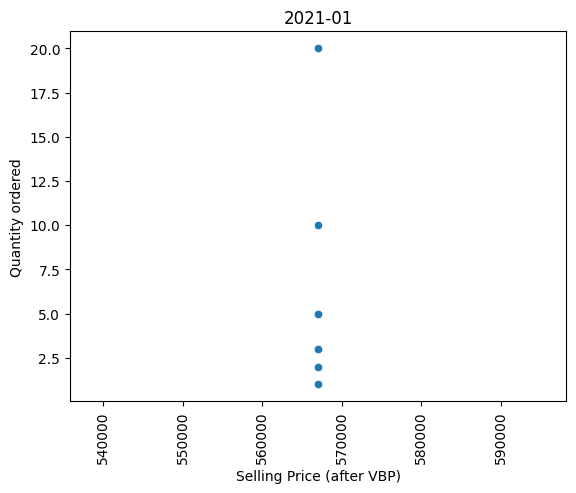

In [17]:
for ym in file_name.year_month.unique():
    filtered = file_name[file_name['year_month'] == ym]
    plt.xlabel("Selling Price (after VBP)")
    plt.ylabel('Quantity ordered')
    plt.title('{}'.format(ym))
    #plt.xlim(550000, 765000)
    #plt.ylim(0,100)

    plt.xticks(rotation=90)
    sns.scatterplot(y =filtered['order_quantity'], x= filtered['price_sold_at'])
    plt.title('{}'.format(ym))
    plt.show()

### MoM Box Plots 
During the Lebran sale in April, the modal order quantity rose from the usual 1-2 -> 4-5 items. 

### Analysis of the average order quantity over the months. 

nan
nan
nan


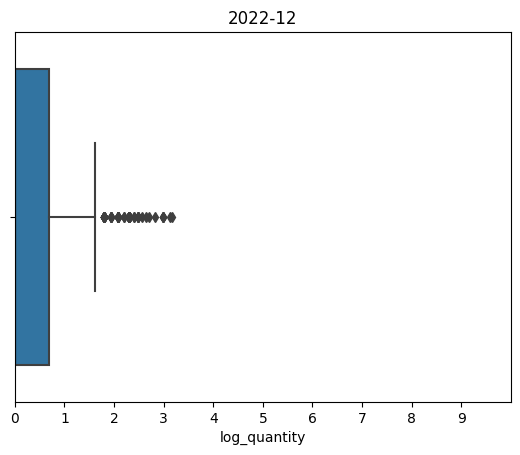

1.0
1.0
2.0


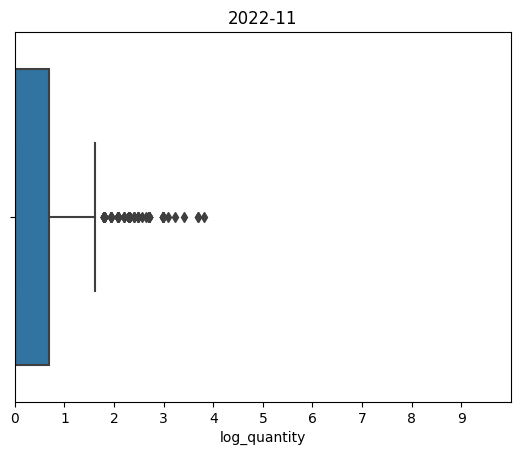

nan
nan
nan


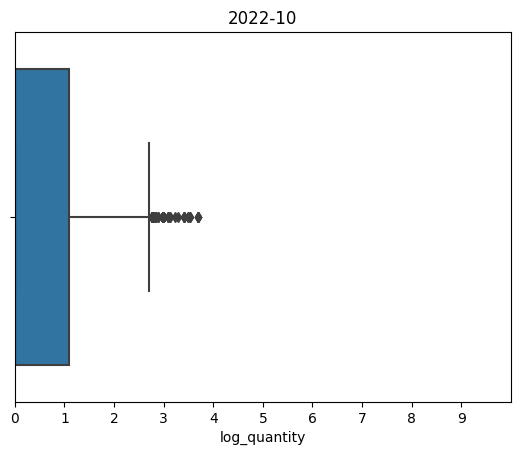

1.0
1.0
2.0


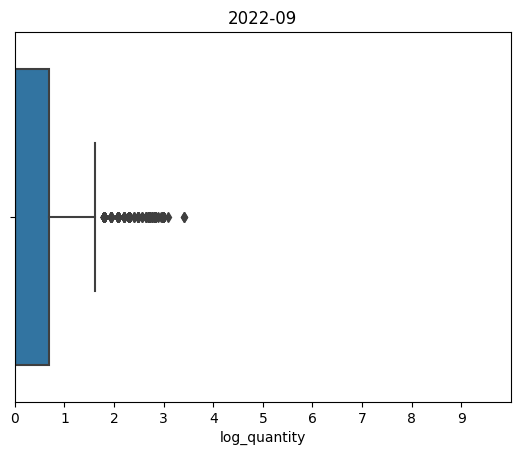

1.0
1.0
2.0


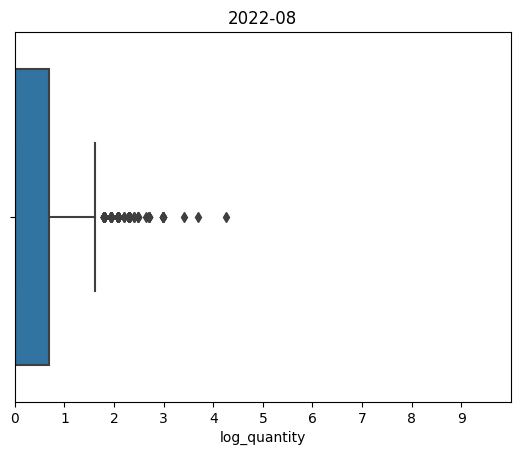

1.0
1.0
2.0


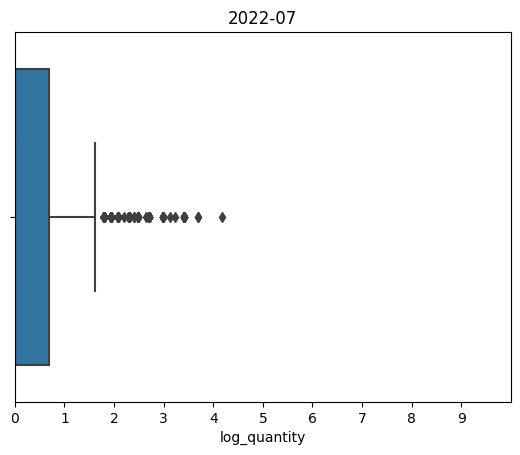

1.0
1.0
2.0


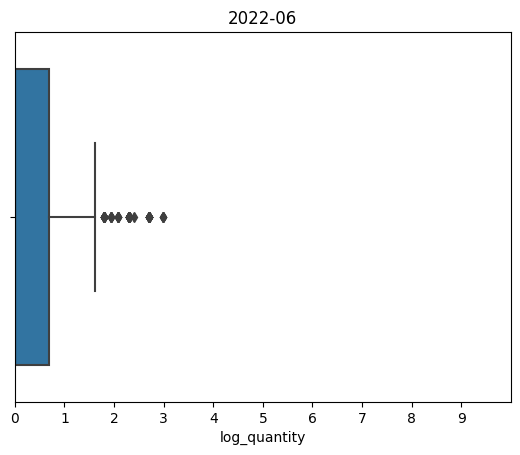

1.0
1.0
3.0


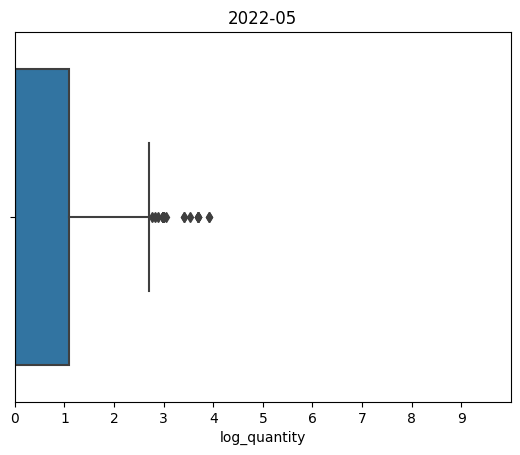

1.0
1.0
3.0


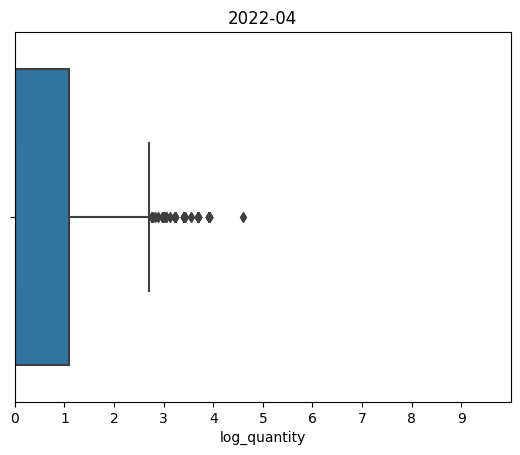

1.0
2.0
3.0


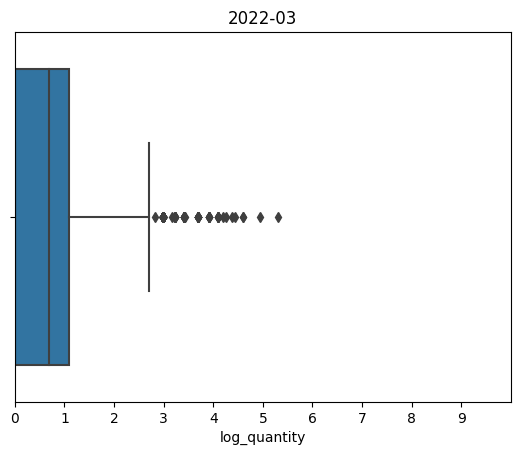

1.0
1.0
2.0


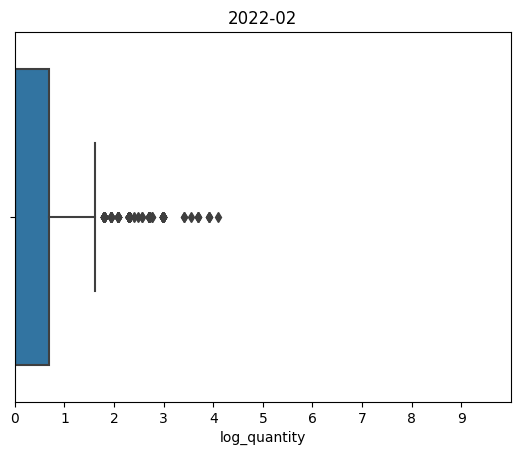

1.0
1.0
3.0


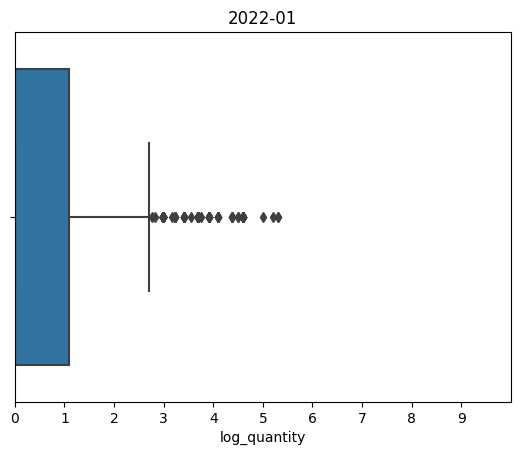

1.0
1.0
2.0


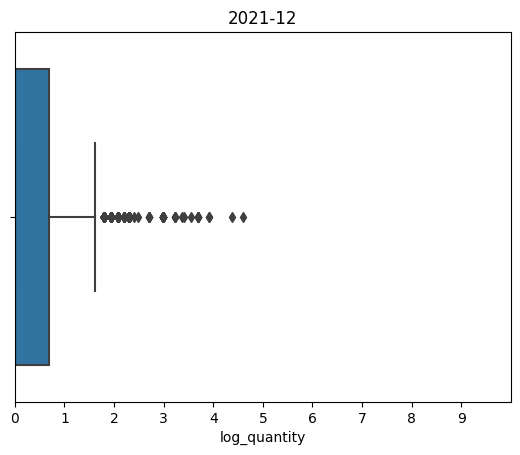

1.0
1.0
2.0


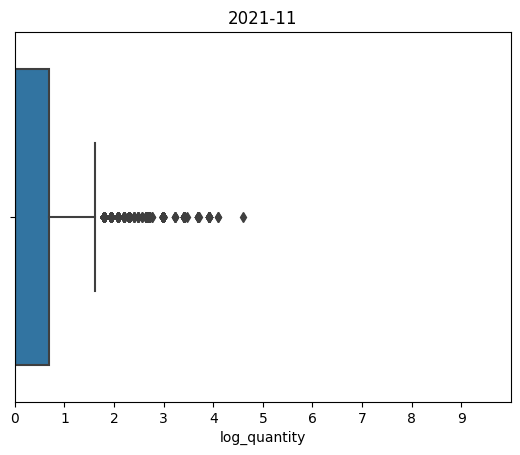

1.0
1.0
3.0


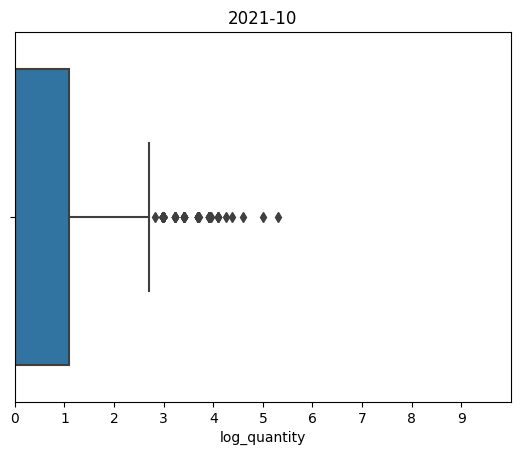

1.0
1.0
2.0


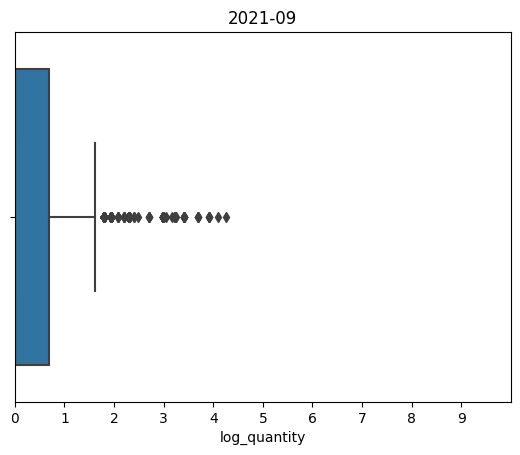

1.0
1.0
5.0


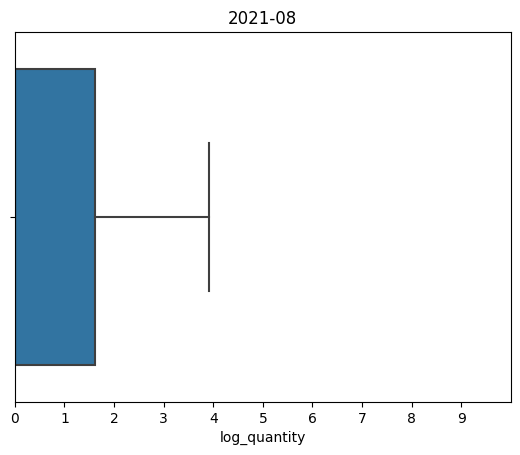

1.0
1.0
2.0


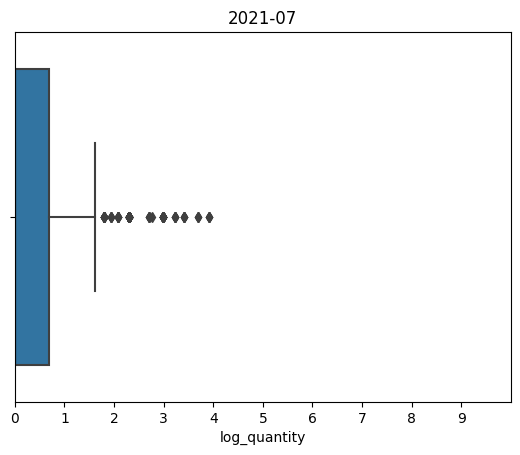

1.0
1.0
3.0


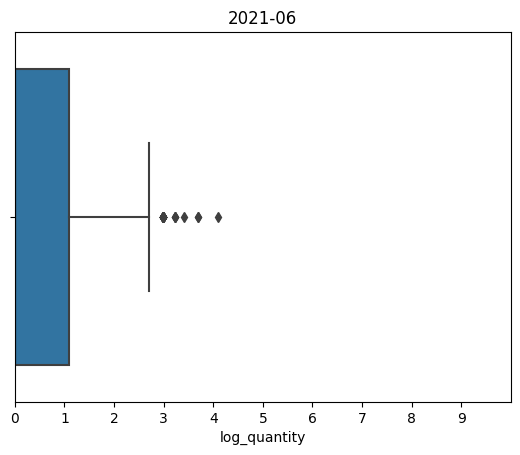

1.0
2.0
4.0


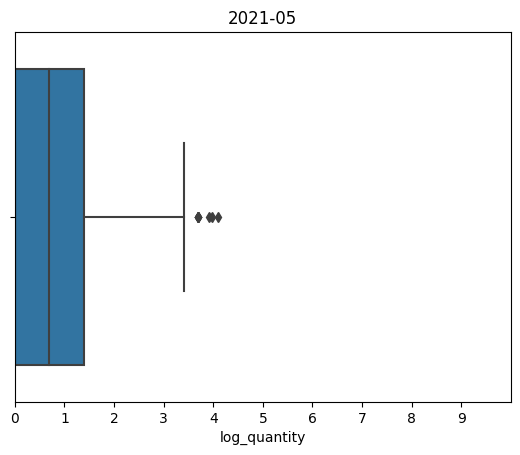

1.0
1.0
3.0


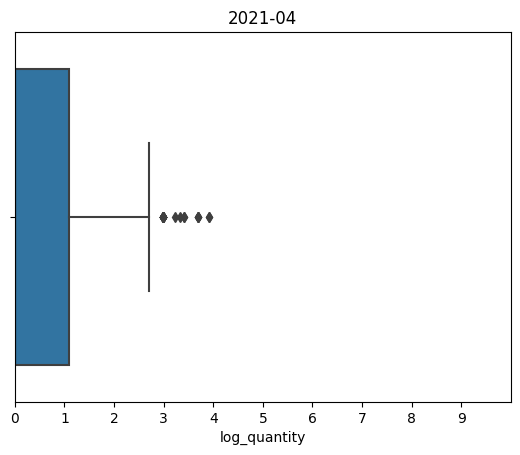

1.0
1.0
1.0


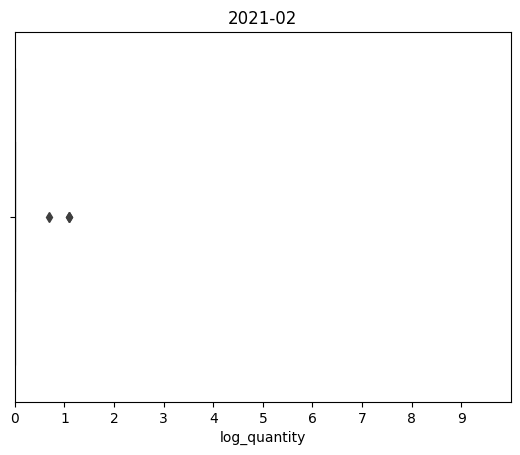

1.0
1.0
1.0


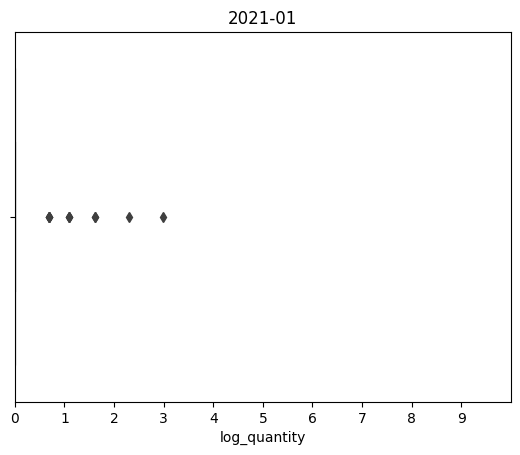

In [19]:
for ym in file_name.year_month.unique():
    filtered = file_name[file_name['year_month'] == ym]
    
#     plt.xlabel('Profit')
#     plt.ylabel('Quantity ordered')
    plt.title('{}'.format(ym))
    plt.xlim(0,10,1)
    plt.xticks(range(0,10,1), rotation=0)
    #plt.ylim(0,100)

    #plt.xticks(rotation=90)
    sns.boxplot(data=filtered, x ='log_quantity')
    print(np.quantile(filtered['order_quantity'], 0.25))
    print(np.quantile(filtered['order_quantity'], 0.50))
    print(np.quantile(filtered['order_quantity'], 0.75))
    #plt.title('{}'.format(ym))
    plt.show()

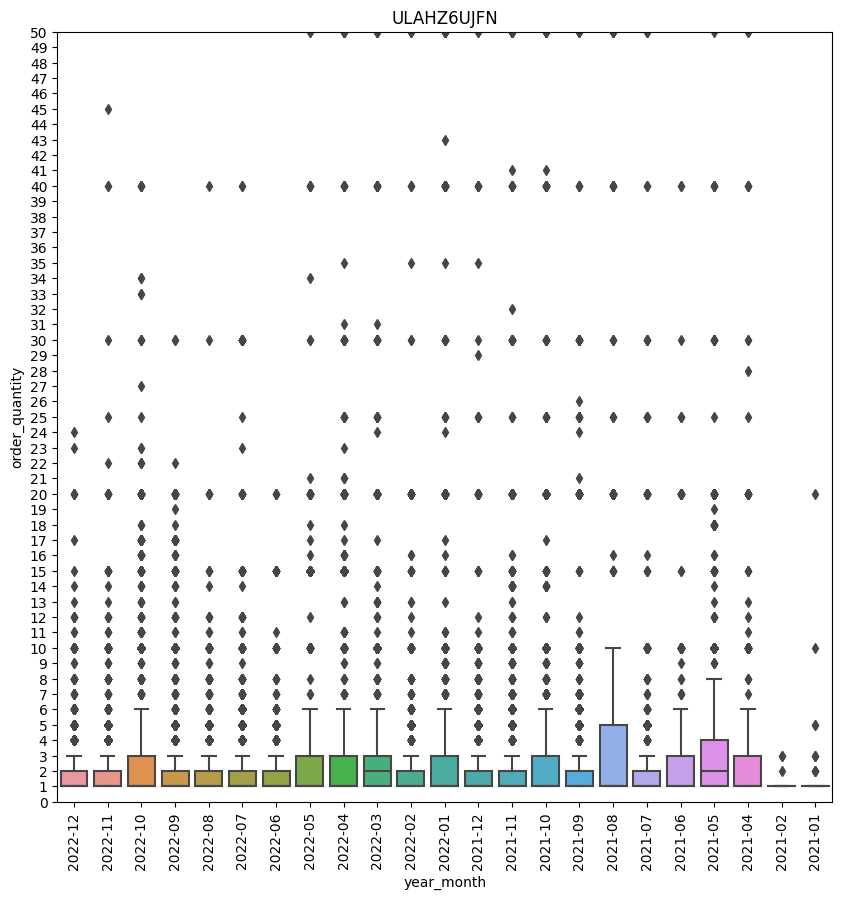

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=file_name, y ='order_quantity', x='year_month')
plt.title('{}'.format(usin))
plt.ylim(0,50)
plt.yticks(range(0,51,1),rotation=0)
plt.xticks(rotation=90)
plt.show()

### MoM VBP range

Text(0.5, 1.0, 'ULAHZ6UJFN')

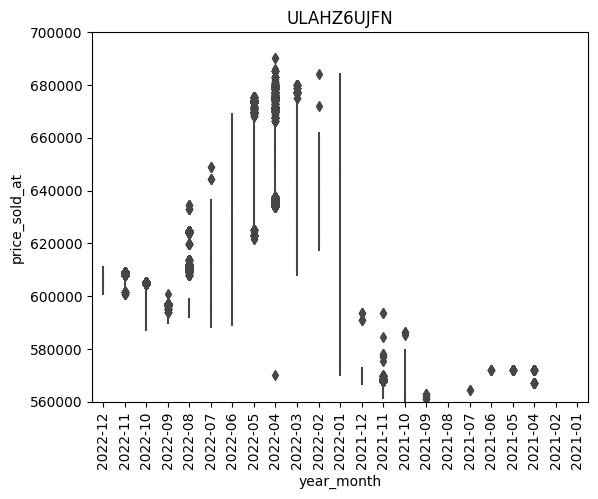

In [22]:
sns.boxplot(x=file_name['year_month'],y=file_name['price_sold_at'], width=False)
plt.xticks(rotation=90)
plt.ylim(560000,700000)
plt.title('{}'.format(usin))